In [21]:
from youtube_transcript_api import YouTubeTranscriptApi
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chat_models import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display
load_dotenv()
import os
from typing_extensions import TypedDict


In [17]:
from langchain_groq import ChatGroq

#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="qwen-2.5-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.003907077, 'queue_time': 0.239099478, 'total_time': 0.053907077}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-c3e68df3-49eb-4f09-bcdc-8bdbdbd0f24d-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

In [8]:
video_id = 'rnPtpNTLuT8&t'#'rnPtpNTLuT8&t'  # Replace with your video ID
transcript = YouTubeTranscriptApi.get_transcript(video_id)

# Print the transcript data
print(transcript)  # This will display the fetched transcript as a list

[{'text': 'hey hello everyone welcome to my yoube', 'start': 0.56, 'duration': 5.839}, {'text': "channel my name is s Savita and I'm back", 'start': 3.0, 'duration': 5.88}, {'text': 'with another exciting and important', 'start': 6.399, 'duration': 5.081}, {'text': 'video so guys as you know I started with', 'start': 8.88, 'duration': 4.719}, {'text': 'this end to endend langra course and', 'start': 11.48, 'duration': 6.0}, {'text': 'this is 12th video of this end to end go', 'start': 13.599, 'duration': 7.081}, {'text': 'I already uploaded 11 video and inside', 'start': 17.48, 'duration': 5.92}, {'text': 'those video I cover up almost each and', 'start': 20.68, 'duration': 4.839}, {'text': 'everything which is required to', 'start': 23.4, 'duration': 4.24}, {'text': 'understand this Lang graph now inside', 'start': 25.519, 'duration': 3.801}, {'text': "this particular video we'll try to", 'start': 27.64, 'duration': 3.84}, {'text': 'discuss one more agentic pattern one', 'start': 29.3

In [22]:
# Extract the text from the transcript
transcript_text = " ".join([item['text'] for item in transcript])
transcript_text


"hey hello everyone welcome to my yoube channel my name is s Savita and I'm back with another exciting and important video so guys as you know I started with this end to endend langra course and this is 12th video of this end to end go I already uploaded 11 video and inside those video I cover up almost each and everything which is required to understand this Lang graph now inside this particular video we'll try to discuss one more agentic pattern one more very important concept related to The Lang graph that is human in Loop we'll try to understand the concept of the checkpointing and break pointing uh which is directly related to this human in Loop and even I will explain you this uh term like what is the meaning of human in Loop okay so uh yeah this is going to be very important concept and that's why I kept it inside my slus and after completing this particular topic we'll uh move to the rag so try to create or will try to implement the different different kind of rag like correcti

In [24]:
class State(TypedDict):
    yt_id:str
    transcript:str
    blog:str
    review:str
    feedback:str


In [ ]:
def generate_transcript(state:State):
    """Generate the transcript from the video id"""
    transcript = YouTubeTranscriptApi.get_transcript(state['yt_id'])
    transcript_text = " ".join([item['text'] for item in transcript])
    return {"transcript":transcript_text}
    

In [36]:
def blog_generation(state:State):
    """Generate the blog content by summarizing the transcript"""
    blog_content=llm.invoke(f"Summarize the transcript and generate a blog from the summary {state['transcript']}")

    return {"blog":blog_content}

In [28]:
def reviewer(state:State):
    "Review the generated content and correct for any grammer or spelling mistakes and structure the content in a good way"
    review_content= llm.invoke(f'Review and correct for any grammer or spelling mistakes and structure the content in a good way {state['blog']}')

    return {'review':review_content}

In [29]:
def collect_feedback(state:State):
    feedback=input('Is the blog content good? (yes/no)')

    return {'feedback':feedback}

In [31]:
def human_feedback(state:State):
    if state['feedback'].lower()=='yes':
        return "end"
    elif state['feedback'].lower()=='no':
        return "regenerate_blog"
    else:
        print('invalid input')
        collect_feedback(state)



In [34]:
from langgraph.graph import StateGraph, START, END

# Create a new graph
workflow = StateGraph(State)

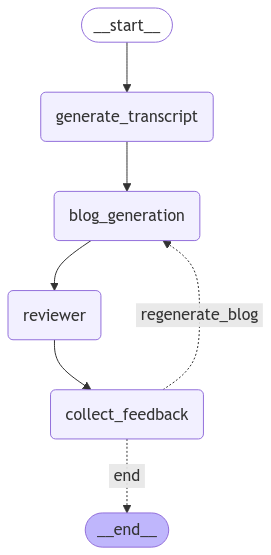

In [35]:

# Add nodes
workflow.add_node("generate_transcript", generate_transcript)
workflow.add_node("blog_generation", blog_generation)  # Ensure this node is added
workflow.add_node("reviewer", reviewer)
workflow.add_node("collect_feedback",collect_feedback)


workflow.add_edge(START,"generate_transcript")
workflow.add_edge("generate_transcript","blog_generation")
workflow.add_edge("blog_generation","reviewer")
workflow.add_edge("reviewer","collect_feedback")

workflow.add_conditional_edges("collect_feedback",human_feedback,{"end":END,"regenerate_blog":"blog_generation"})

graph=workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
state=graph.invoke({"yt_id":"rnPtpNTLuT8&t"})
state

APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `qwen-2.5-32b` in organization `org_01jkn20chzfmdb85t5x02rctae` service tier `on_demand` on tokens per minute (TPM): Limit 6000, Requested 10651, please reduce your message size and try again. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}